<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/sentimentos/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
!nvidia-smi

Mon Oct 16 13:33:14 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.113.01             Driver Version: 535.113.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti     Off | 00000000:08:00.0  On |                  N/A |
|  0%   56C    P0              67W / 285W |    820MiB / 12282MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [88]:
date = '2023-09-01'
filename = 'analisar.csv'
exploratoria = pd.read_csv(f"/content/gdrive/MyDrive/tcc/exploratoria/{date}-{filename}")

exploratoria.sample(5)[['text', 'data_avaliacao']]

,text,data_avaliacao
14709,"Hotel maravilhoso, com vista para o mar. Simpl...",2023-06-23
3898,"Adorei, resort muito bom.",2023-06-07
8529,"O hotel é um pouco antigo, necessitando maiore...",2019-07-08
12755,Simplesmente maravilhoso,2020-07-07
31895,"O resort é divino, parece que você está no ...",2023-07-06


In [89]:
treinado = pd.read_csv(f"/content/gdrive/MyDrive/tcc/testando-classificacao.csv")

treinado.sample(5)[['text', 'data_avaliacao', 'sentiment_bert']]

,text,data_avaliacao,sentiment_bert
48031,Muito caro para o que oferece. O lugar é ótimo...,2018-07-08,negative
32354,"Ótimo atendimento diversidade de comida, limpe...",2022-08-11,positive
28869,"Experiência fantástica pra qualquer pessoa, fi...",2023-07-01,positive
19237,É a segunda vez que eu e minha família nos hos...,2023-05-08,negative
18321,"Lugar perfeito para o lazer, comida deliciosa ...",2019-07-08,positive


In [90]:
dados = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_v2.csv")

dados.sample(5)[['text', 'data_avaliacao', 'sentiment_bert']]

,text,data_avaliacao,sentiment_bert
14439,Tudo perfeito lugar maravilhoso,2023-06-30,"[{'label': 'Positive', 'score': 0.992552042007..."
22434,Incrível,2020-07-07,"[{'label': 'Muito Positivo', 'score': 0.966832..."
11700,Tudo de bom,2022-07-07,"[{'label': 'Positive', 'score': 0.986887872219..."
1221,"Boa tarde, o hotel tem uma estrutura muito boa...",2019-07-08,"[{'label': 'Negative', 'score': 0.884159862995..."
45102,"Vale a pena cada dia , cada segundo neste para...",2018-07-08,"[{'label': 'Positive', 'score': 0.983158707618..."


In [91]:
gpt = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_gpt.csv")

gpt.sample(5)[['text', 'data_avaliacao', 'resultado_gpt']]

,text,data_avaliacao,resultado_gpt
8771,"Excelente. Paraíso tropical, praias deliciosas...",2018-07-08,2
38810,Com relação a instalações a atendimento são in...,2022-07-07,2
12245,Muito bom passar uma semana nesse Resort. Ador...,2021-07-07,2
31639,"É um bom Hotel, mais ainda existe quartos muit...",2018-07-08,0
25864,Cana aventure....galera top!..,2023-01-08,2


In [92]:
dados.describe()

,Unnamed: 0,rating,likes,mes_avaliacao,ano_avaliacao
count,49219.000000,49219.000000,49219.000000,49219.000000,49219.000000
mean,24609.000000,4.604787,0.166623,6.790650,2020.699181
std,14208.445786,0.895289,0.731727,1.524495,1.746374
min,0.000000,1.000000,0.000000,1.000000,2018.000000
25%,12304.500000,5.000000,0.000000,7.000000,2019.000000
50%,24609.000000,5.000000,0.000000,7.000000,2021.000000
75%,36913.500000,5.000000,0.000000,7.000000,2022.000000
max,49218.000000,5.000000,25.000000,12.000000,2023.000000


# 08

## bert pre treinado

In [130]:
PRE_TRAINED_MODEL_NAME_5 = 'ramonmedeiro1/bertimbau-products-reviews-pt-br'
PRE_TRAINED_MODEL_NAME_4 = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
PRE_TRAINED_MODEL_NAME_3 = 'citizenlab/twitter-xlm-roberta-base-sentiment-finetunned'
PRE_TRAINED_MODEL_NAME_2 = 'lxyuan/distilbert-base-multilingual-cased-sentiments-student'
PRE_TRAINED_MODEL_NAME_1 = 'philschmid/distilbert-base-multilingual-cased-sentiment'

MODELS = [PRE_TRAINED_MODEL_NAME_1,PRE_TRAINED_MODEL_NAME_2,PRE_TRAINED_MODEL_NAME_3,PRE_TRAINED_MODEL_NAME_4,PRE_TRAINED_MODEL_NAME_5]
teste = dados.copy()

translate = {"muito positivo": "positive", "muito negativo": "negative", "neutro": "neutral", "negativo": "negative", "positivo": "positive"}

In [131]:
translate['muito positivo']

'positive'

In [132]:
def traduzir_bert_5(row):
  row = ast.literal_eval(row)
  value = row['label'].lower()
  score = row['score']
  label = translate[value]
  return {'label': label, 'score': score}

def lower_bert_3(row):
  row = ast.literal_eval(row)
  label = row['label'].lower()
  score = row['score']
  return {'label': label, 'score': score}

In [146]:
type('a') == str

True

In [203]:
import ast

def try_parse(x):
  if type(x) == str:
    return ast.literal_eval(x)
  return x

In [134]:
columns_to_transform = ['sentiment_bert_1','sentiment_bert_2','sentiment_bert_3','sentiment_bert_4','sentiment_bert_5']

In [135]:
teste['sentiment_bert_5'] = teste['sentiment_bert_5'].apply(traduzir_bert_5)
teste['sentiment_bert_3'] = teste['sentiment_bert_3'].apply(lower_bert_3)

In [204]:
cols = columns_to_transform
teste['sentiment_bert_1'] = teste['sentiment_bert_1'].apply(lambda x: try_parse(x))
teste['sentiment_bert_2'] = teste['sentiment_bert_2'].apply(lambda x: try_parse(x))
teste['sentiment_bert_3'] = teste['sentiment_bert_3'].apply(lambda x: try_parse(x))
teste['sentiment_bert_4'] = teste['sentiment_bert_4'].apply(lambda x: try_parse(x))
teste['sentiment_bert_5'] = teste['sentiment_bert_5'].apply(lambda x: try_parse(x))
teste['sentiment_bert'] = teste[cols].apply(lambda row: row.values.tolist(), axis=1)

In [206]:
try_parse(teste.iloc[40522]['sentiment_bert'])

[{'label': 'positive', 'score': 0.9965198040008545},
 {'label': 'positive', 'score': 0.9393256306648254},
 {'label': 'positive', 'score': 0.9923418760299683},
 {'label': 'positive', 'score': 0.931358277797699},
 {'label': 'positive', 'score': 0.9673769474029541}]

In [207]:
teste.sample(1)

,Unnamed: 0,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,...,depois_2017,analisar,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score
40706,40706,2023-07-07 00:50:13.283667,3.0,2 anos atrás,0,True,Senhorita Cássia (recepcionista do Iberostar B...,iberostar-bahia,98,2021-07-07,...,True,True,"{'label': 'negative', 'score': 0.8998367786407...","{'label': 'negative', 'score': 0.7803813815116...","{'label': 'negative', 'score': 0.7834447026252...","{'label': 'negative', 'score': 0.7095344662666...","{'label': 'negative', 'score': 0.7762166857719...","[{'label': 'negative', 'score': 0.899836778640...","['negative', 'muito negativo']","{0.8998367786407471, 0.7834447026252747, 0.709..."


In [208]:
import numpy as np

teste['sentiment_bert_max'] = teste['sentiment_bert'].apply(lambda x: MODELS[np.argmax(list(map(lambda y: y['score'], x)))])

In [209]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

teste['sentiment_label'] = teste['sentiment_bert'].apply(lambda x: f7(list(map(lambda y: y['label'].lower(), x))))
teste['sentiment_score'] = teste['sentiment_bert'].apply(lambda x: set(map(lambda y: y['score'], x)))

In [216]:
teste[['ano_avaliacao', 'source', 'text', 'sentiment_bert', 'sentiment_label', 'sentiment_score', 'sentiment_bert_max']].sample(n = 5)

,ano_avaliacao,source,text,sentiment_bert,sentiment_label,sentiment_score,sentiment_bert_max
365,2022,hotel-marsol-beach-resort,A recei foi excelente e entretenimento também.,"[{'label': 'positive', 'score': 0.953570485115...",[positive],"{0.9535704851150513, 0.9814462065696716, 0.882...",citizenlab/twitter-xlm-roberta-base-sentiment-...
28568,2022,cana-brava-all-inclusive-resort,"Tio Orelha e Tia Cachinhos Amei eles demais, e...","[{'label': 'positive', 'score': 0.974459230899...",[positive],"{0.9744592308998108, 0.8568829298019409, 0.847...",citizenlab/twitter-xlm-roberta-base-sentiment-...
31472,2018,cana-brava-all-inclusive-resort,"Lindo, confortável e comida gostosa","[{'label': 'positive', 'score': 0.964287042617...",[positive],"{0.9642870426177979, 0.9711055755615234, 0.719...",citizenlab/twitter-xlm-roberta-base-sentiment-...
29254,2021,cana-brava-all-inclusive-resort,Lugar maravilhoso com atendimento impecável!,"[{'label': 'positive', 'score': 0.991700351238...",[positive],"{0.9917003512382507, 0.9061179757118225, 0.943...",citizenlab/twitter-xlm-roberta-base-sentiment-...
1085,2020,hotel-marsol-beach-resort,"Hotel antigo, deixa a desejar no conforto, mui...","[{'label': 'negative', 'score': 0.471612960100...","[negative, positive, neutral]","{0.47161296010017395, 0.5575070977210999, 0.63...",ramonmedeiro1/bertimbau-products-reviews-pt-br


In [220]:
teste['sentiment_label']

0                  [positive]
1        [positive, negative]
2                  [positive]
3                  [positive]
4                  [positive]
                 ...         
49214    [positive, negative]
49215     [positive, neutral]
49216              [positive]
49217              [positive]
49218              [positive]
Name: sentiment_label, Length: 49219, dtype: object

In [ ]:
teste[teste.text == 'Lindo d mais']

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,depois_2017,analisar,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score
5962,2023-07-07 00:59:10.935631,3.0,5 anos atrás,0,True,Lindo d mais,salinas-maceió-all-inclusive-resort,13,2018-07-08,7,...,True,True,"{'label': 'neutral', 'score': 0.4194217622280121}","{'label': 'positive', 'score': 0.5910865664482...","{'label': 'Positive', 'score': 0.9915336966514...","{'label': 'positive', 'score': 0.8819499015808...","{'label': 'Muito Positivo', 'score': 0.9520753...","[{'label': 'Positive', 'score': 0.991533696651...","[positive, muito positivo, neutral]","{0.9915336966514587, 0.9520753026008606, 0.419..."


In [ ]:
teste.to_csv('/content/gdrive/MyDrive/tcc/bert/analise_sentimento_v3.csv')

In [ ]:
teste = pd.read_csv('/content/gdrive/MyDrive/tcc/bert/analise_sentimento_v2.csv')

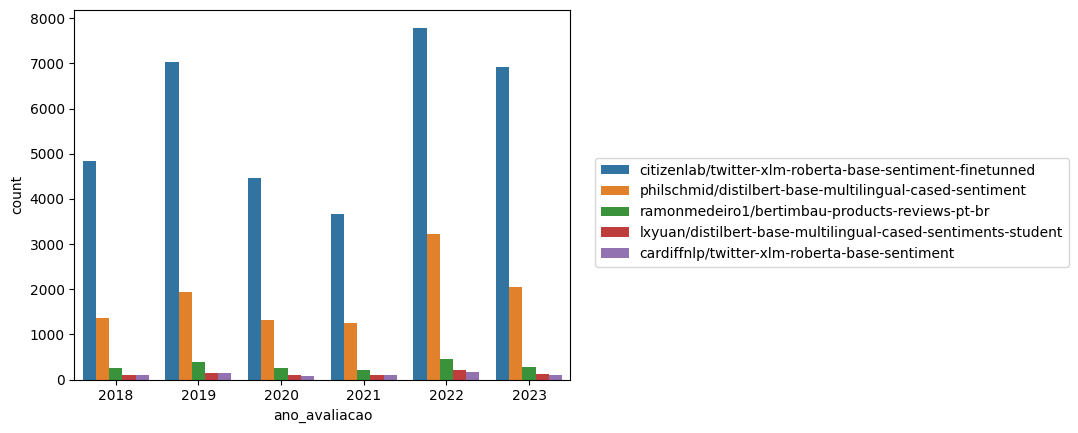

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='ano_avaliacao',
              hue='sentiment_bert_max',
              data=teste)
plt.legend(bbox_to_anchor=(1.05, .6), loc='upper left', borderaxespad=0)

In [ ]:
import seaborn as sns

sns.relplot(x='ano_avaliacao', y='sentiment_score', kind="line", hue='sentiment_label', data=teste)

In [ ]:
sns.relplot(x='ano_avaliacao', y='sentiment_score_2', kind="line", hue='sentiment_label_2', data=teste)

In [ ]:
sns.countplot(x='ano_avaliacao',
              hue='sentiment_label',
              data=teste,
              dodge=False)

In [ ]:
sns.countplot(x='ano_avaliacao',
              hue='sentiment_label_2',
              data=teste)

In [ ]:
sns.relplot(x='ano_avaliacao', col_wrap=3, col="source", y='sentiment_score', hue='sentiment_label', data=teste, kind='line')

In [ ]:
teste[(teste.sentiment_label != teste.sentiment_label_2)][['text','sentiment_label', 'sentiment_score']]

In [ ]:
sns.relplot(x='ano_avaliacao', y='sentiment_score_2', kind="line", hue='sentiment_label_2', data=teste[(teste.sentiment_label != teste.sentiment_label_2)], palette='Set2')
sns.relplot(x='ano_avaliacao', y='sentiment_score', kind="line", hue='sentiment_label', data=teste[(teste.sentiment_label != teste.sentiment_label_2)], palette='Set2')

In [ ]:
sns.scatterplot(data=teste[(teste.sentiment_label != teste.sentiment_label_2) & (abs(teste.sentiment_score - teste.sentiment_score_2) > 0.00)], x="sentiment_score", y="sentiment_score_2")

In [ ]:
teste[(teste.sentiment_label != teste.sentiment_label_2) & (abs(teste.sentiment_score - teste.sentiment_score_2) > 0.00)].sample()

In [237]:
teste[teste['sentiment_label'].apply(lambda x: len(x) == 1)][['sentiment_label', 'rating', 'text', 'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3', 'sentiment_bert_4','sentiment_bert_5']]

,sentiment_label,rating,text,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5
0,[positive],5.0,"Lugar fantástico, recomendo super.","{'label': 'positive', 'score': 0.9849022030830...","{'label': 'positive', 'score': 0.9592684507369...","{'label': 'positive', 'score': 0.9925462603569...","{'label': 'positive', 'score': 0.9392898678779...","{'label': 'positive', 'score': 0.936265766620636}"
2,[positive],5.0,excelente!,"{'label': 'positive', 'score': 0.9857670068740...","{'label': 'positive', 'score': 0.9891675710678...","{'label': 'positive', 'score': 0.9923394918441...","{'label': 'positive', 'score': 0.7664870023727...","{'label': 'positive', 'score': 0.9381666779518..."
3,[positive],5.0,Belo lugar.,"{'label': 'positive', 'score': 0.8551892638206...","{'label': 'positive', 'score': 0.781340479850769}","{'label': 'positive', 'score': 0.9930474162101...","{'label': 'positive', 'score': 0.9130381941795...","{'label': 'positive', 'score': 0.9350948929786..."
4,[positive],5.0,Ótimo local,"{'label': 'positive', 'score': 0.8495931029319...","{'label': 'positive', 'score': 0.5628671050071...","{'label': 'positive', 'score': 0.9923906922340...","{'label': 'positive', 'score': 0.8959783315658...","{'label': 'positive', 'score': 0.5224364995956..."
5,[positive],5.0,excelente local otima vista e hospitalidade pe...,"{'label': 'positive', 'score': 0.9734945893287...","{'label': 'positive', 'score': 0.9737055897712...","{'label': 'positive', 'score': 0.988045871257782}","{'label': 'positive', 'score': 0.8940903544425...","{'label': 'positive', 'score': 0.7696133852005..."
...,...,...,...,...,...,...,...,...
49212,[positive],5.0,Hotel maravilhoso!!!! Equipe de lazer sensacio...,"{'label': 'positive', 'score': 0.9956278800964...","{'label': 'positive', 'score': 0.9781378507614...","{'label': 'positive', 'score': 0.9922709465026...","{'label': 'positive', 'score': 0.9344256520271...","{'label': 'positive', 'score': 0.9551658034324..."
49213,[positive],5.0,Simplesmente amei,"{'label': 'positive', 'score': 0.727571427822113}","{'label': 'positive', 'score': 0.608471155166626}","{'label': 'positive', 'score': 0.9922024011611...","{'label': 'positive', 'score': 0.9030223488807...","{'label': 'positive', 'score': 0.8786059617996..."
49216,[positive],5.0,Excelente Resort,"{'label': 'positive', 'score': 0.987581729888916}","{'label': 'positive', 'score': 0.9462223052978...","{'label': 'positive', 'score': 0.9921082854270...","{'label': 'positive', 'score': 0.8081861138343...","{'label': 'positive', 'score': 0.937822163105011}"
49217,[positive],4.0,Lugar lindo! Ótimo para descansar.,"{'label': 'positive', 'score': 0.9002830386161...","{'label': 'positive', 'score': 0.6816404461860...","{'label': 'positive', 'score': 0.9932357668876...","{'label': 'positive', 'score': 0.9274115562438...","{'label': 'positive', 'score': 0.8857972621917..."


In [238]:
teste[teste['sentiment_label'].apply(lambda x: len(x) == 2)][['sentiment_label', 'rating', 'text', 'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3', 'sentiment_bert_4','sentiment_bert_5']]

,sentiment_label,rating,text,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5
1,"[positive, negative]",5.0,Tudo perfeito,"{'label': 'positive', 'score': 0.9701986312866...","{'label': 'negative', 'score': 0.6602097153663...","{'label': 'positive', 'score': 0.9922283291816...","{'label': 'positive', 'score': 0.8660374283790...","{'label': 'positive', 'score': 0.8999789953231..."
14,"[negative, positive]",5.0,Muito aconchegante,"{'label': 'negative', 'score': 0.4147743880748...","{'label': 'negative', 'score': 0.5092098712921...","{'label': 'negative', 'score': 0.9808983206748...","{'label': 'negative', 'score': 0.7344182133674...","{'label': 'positive', 'score': 0.5176873207092..."
17,"[neutral, positive]",5.0,"Quadra, piscina, praça e ao lado da praia sem ...","{'label': 'neutral', 'score': 0.5129052996635437}","{'label': 'positive', 'score': 0.5697891712188...","{'label': 'neutral', 'score': 0.6083300113677979}","{'label': 'neutral', 'score': 0.4814223349094391}","{'label': 'positive', 'score': 0.9675008654594..."
19,"[positive, negative]",5.0,É um ótimo hotel para levar a família e curtir...,"{'label': 'positive', 'score': 0.9578593969345...","{'label': 'negative', 'score': 0.5199328660964...","{'label': 'positive', 'score': 0.9722692966461...","{'label': 'positive', 'score': 0.9056825041770...","{'label': 'positive', 'score': 0.5757339000701..."
22,"[positive, neutral]",5.0,Atendimento e alimentação.,"{'label': 'positive', 'score': 0.8624117374420...","{'label': 'positive', 'score': 0.7141097187995...","{'label': 'neutral', 'score': 0.9898031949996948}","{'label': 'neutral', 'score': 0.8557446599006653}","{'label': 'positive', 'score': 0.5972226858139..."
...,...,...,...,...,...,...,...,...
49200,"[positive, negative]",5.0,Pelo atenção e atendimento em todos os sentido...,"{'label': 'positive', 'score': 0.9378687739372...","{'label': 'negative', 'score': 0.5224962830543...","{'label': 'positive', 'score': 0.9896613359451...","{'label': 'positive', 'score': 0.883582353591919}","{'label': 'positive', 'score': 0.9030633568763..."
49201,"[negative, positive]",5.0,Tudo de bom,"{'label': 'negative', 'score': 0.6747020483016...","{'label': 'negative', 'score': 0.7172132730484...","{'label': 'positive', 'score': 0.9868878722190...","{'label': 'positive', 'score': 0.8054354190826...","{'label': 'positive', 'score': 0.9619171023368..."
49206,"[positive, neutral]",5.0,Tudo,"{'label': 'positive', 'score': 0.8212609887123...","{'label': 'positive', 'score': 0.4054795801639...","{'label': 'neutral', 'score': 0.913355827331543}","{'label': 'neutral', 'score': 0.40985575318336...","{'label': 'positive', 'score': 0.6093111634254..."
49214,"[positive, negative]",5.0,"Excelente alimentação, quartos confortáveis e ...","{'label': 'positive', 'score': 0.9905057549476...","{'label': 'positive', 'score': 0.7780378460884...","{'label': 'negative', 'score': 0.9507042169570...","{'label': 'negative', 'score': 0.7147853970527...","{'label': 'positive', 'score': 0.9070519804954..."


In [232]:
teste[teste['sentiment_label'].apply(lambda x: len(x) > 2)][['sentiment_label', 'rating', 'text', 'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3', 'sentiment_bert_4','sentiment_bert_5']]

,sentiment_label,rating,text,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5
20,"[neutral, positive, negative]",3.0,"O hotel é limpo, os funcionários muito educado...","{'label': 'neutral', 'score': 0.725369930267334}","{'label': 'positive', 'score': 0.507336437702179}","{'label': 'negative', 'score': 0.5601344108581...","{'label': 'negative', 'score': 0.7183690667152...","{'label': 'negative', 'score': 0.6584920287132..."
39,"[positive, neutral, negative]",5.0,Sem palavras,"{'label': 'positive', 'score': 0.3510648608207...","{'label': 'neutral', 'score': 0.4789133667945862}","{'label': 'negative', 'score': 0.7170167565345...","{'label': 'negative', 'score': 0.5785571932792...","{'label': 'positive', 'score': 0.9411648511886..."
57,"[neutral, negative, positive]",5.0,Lugar incrível,"{'label': 'neutral', 'score': 0.510798990726471}","{'label': 'negative', 'score': 0.4616160988807...","{'label': 'positive', 'score': 0.9919718503952...","{'label': 'positive', 'score': 0.864551842212677}","{'label': 'positive', 'score': 0.9519617557525..."
130,"[neutral, negative, positive]",5.0,Lugar incrível,"{'label': 'neutral', 'score': 0.510798990726471}","{'label': 'negative', 'score': 0.4616160988807...","{'label': 'positive', 'score': 0.9919718503952...","{'label': 'positive', 'score': 0.864551842212677}","{'label': 'positive', 'score': 0.9519617557525..."
132,"[neutral, negative, positive]",3.0,"Difícil dizer,por que amo praia e é um lugar q...","{'label': 'neutral', 'score': 0.45937931537628...","{'label': 'negative', 'score': 0.4774778187274...","{'label': 'positive', 'score': 0.9845324158668...","{'label': 'positive', 'score': 0.8982284665107...","{'label': 'positive', 'score': 0.9264105558395..."
...,...,...,...,...,...,...,...,...
49140,"[negative, positive, neutral]",4.0,"Passamos só 4 dias no Salinas, pois era só o q...","{'label': 'negative', 'score': 0.9009762406349...","{'label': 'positive', 'score': 0.5664177536964...","{'label': 'neutral', 'score': 0.9686949849128723}","{'label': 'neutral', 'score': 0.3812373876571655}","{'label': 'positive', 'score': 0.750812828540802}"
49142,"[neutral, negative, positive]",4.0,"Muito bom, mas acho que não é o melhor App inc...","{'label': 'neutral', 'score': 0.4654511511325836}","{'label': 'negative', 'score': 0.736460268497467}","{'label': 'negative', 'score': 0.6970648169517...","{'label': 'negative', 'score': 0.6932324767112...","{'label': 'positive', 'score': 0.6773813366889..."
49191,"[negative, positive, neutral]",4.0,Comida é excelente. Mas me decepcionei com as ...,"{'label': 'negative', 'score': 0.5389358997344...","{'label': 'positive', 'score': 0.6376407146453...","{'label': 'negative', 'score': 0.9732257127761...","{'label': 'negative', 'score': 0.9444505572319...","{'label': 'neutral', 'score': 0.7535067200660706}"
49192,"[positive, negative, neutral]",2.0,"ola, Estive agora em junho de 2017, de boa na...","{'label': 'positive', 'score': 0.5947734117507...","{'label': 'negative', 'score': 0.5397107005119...","{'label': 'neutral', 'score': 0.7206991910934448}","{'label': 'negative', 'score': 0.7116811275482...","{'label': 'negative', 'score': 0.4659240841865..."


In [246]:
treinado[treinado.text == 'Sem palavras'][['relative_date', 'likes', 'mes_ano_avaliacao', 'analisar', 'sentiment_bert', 'rating', 'text', 'source']]

,relative_date,likes,mes_ano_avaliacao,analisar,sentiment_bert,rating,text,source
39,3 semanas atrás,0,2023-06,True,neutral,5.0,Sem palavras,analisar
7025,2 semanas atrás,0,2023-06,True,neutral,5.0,Sem palavras,analisar
14824,4 anos atrás,0,2019-07,True,neutral,5.0,Sem palavras,analisar
24048,5 anos atrás,0,2018-07,True,neutral,5.0,Sem palavras,analisar
28383,5 anos atrás,0,2018-07,True,neutral,5.0,Sem palavras,analisar
39693,4 anos atrás,1,2019-07,True,neutral,5.0,Sem palavras,analisar
40325,5 anos atrás,0,2018-07,True,neutral,5.0,Sem palavras,analisar


In [251]:
teste[teste.text == 'Sem palavras'][['relative_date', 'likes', 'mes_ano_avaliacao', 'analisar', 'sentiment_label', 'sentiment_bert', 'rating', 'text', 'source']]

,relative_date,likes,mes_ano_avaliacao,analisar,sentiment_label,sentiment_bert,rating,text,source
39,3 semanas atrás,0,2023-06,True,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-marsol-beach-resort
5932,5 anos atrás,0,2018-07,True,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maceió-all-inclusive-resort
14076,5 anos atrás,0,2018-07,True,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,la-torre-resort-all-inclusive
14548,2 semanas atrás,0,2023-06,True,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-vila-galé---touros
35522,4 anos atrás,0,2019-07,True,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-vila-galé-marés
48076,4 anos atrás,1,2019-07,True,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maragogi-all-inclusive-resort
48708,5 anos atrás,0,2018-07,True,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maragogi-all-inclusive-resort


In [248]:
gpt[gpt.text == 'Sem palavras'][['relative_date', 'likes', 'mes_ano_avaliacao', 'analisar', 'sentimento_gpt', 'rating', 'text', 'source']]

,relative_date,likes,mes_ano_avaliacao,analisar,sentimento_gpt,rating,text,source
39,3 semanas atrás,0,2023-06,True,neutral,5.0,Sem palavras,hotel-marsol-beach-resort
5932,5 anos atrás,0,2018-07,True,neutral,5.0,Sem palavras,salinas-maceió-all-inclusive-resort
14076,5 anos atrás,0,2018-07,True,neutral,5.0,Sem palavras,la-torre-resort-all-inclusive
14548,2 semanas atrás,0,2023-06,True,neutral,5.0,Sem palavras,hotel-vila-galé---touros
35522,4 anos atrás,0,2019-07,True,neutral,5.0,Sem palavras,hotel-vila-galé-marés
48076,4 anos atrás,1,2019-07,True,neutral,5.0,Sem palavras,salinas-maragogi-all-inclusive-resort
48708,5 anos atrás,0,2018-07,True,neutral,5.0,Sem palavras,salinas-maragogi-all-inclusive-resort
